## Equation of Motion

$$
\left\{ \begin{array}{c} \dot{x}_1 \\ \dot{x}_2 \\ \dot{x}_3 \\ \dot{x}_4 \end{array} \right\}            =                 \left[ \begin{array}{cccc} 0 & 1 & 0 & 0 \\ -\frac{k_1}{m_1} & -\frac{c_1}{m_1} & \frac{k_1}{m_1} & \frac{c_1}{m_1} \\ 0 & 0 & 0 & 1 \\ \frac{k_1}{m_2} & \frac{c_1}{m_2} & -\frac{k_1+k_2}{m_2} & -\frac{c_1+c_2}{m_2} \end{array} \right]                   \left\{ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \end{array} \right\} + \left\{ \begin{array}{c} 0 \\ 0 \\ 0 \\ \frac{k_2}{m_2} \end{array} \right\}   y_r
$$

$$
\frac{dx}{dt} = Ax + F
$$

$$
\frac{x_{t+1} - x_t}{\Delta t} = Ax_t + F
$$
$$
x_{t+1} = x_t + \Delta t(Ax_t + F)
$$

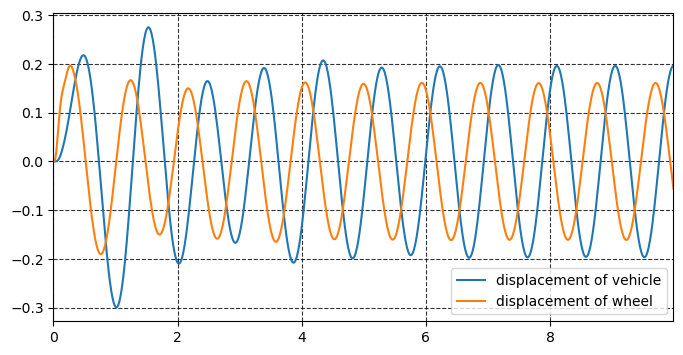

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi

# input
m1 = 400
m2 = 30

k1 = 10e3
k2 = 40e3

c1 = 1000
c2 = 0

a = 0.2 # road bump amplitude
v = 0.85 #velocity of vehicle
d = 0.8 #bump width

w = 2*pi*(v/d) # frequency of the bump

ts = 0
t_step = 0.01
T = np.arange(0,10,t_step)

A = np.array([[0.0, 1.0, 0.0, 0.0],
              [-k1/m1,-c1/m1, k1/m1, c1/m1],
              [0.0, 0.0, 0.0, 1.0],
              [k1/m2,c1/m2,-(k1+k2)/m2,-(c1+c2)/m2]])

F = np.array([0.0,0.0,0.0,0.0])
x = np.array([0.0,0.0,0.0,0.0])
X = []
d1 = []
v1 = []
d2 = []
v2 = []

for t in T:
    F[3] = (k2/m2)*a*sin(w*t)
    x = x + t_step*(A.dot(x) + F)
    X.append(x)
    d1.append(x[0])
    v1.append(x[1])
    d2.append(x[2])
    v2.append(x[3])

plt.figure(figsize=(8,4), dpi=100)
plt.plot(T,d1,label='displacement of vehicle')
plt.plot(T,d2,label='displacement of wheel')
plt.grid(linestyle='--', color='k', alpha=0.8)
plt.legend(loc='best')
plt.xlim(T[0],T[-1])

plt.show()

